# Predicting Time Series Forecast - Fast Food Sales - LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
from keras.models import load_model
from sklearn import model_selection
%matplotlib inline

Using TensorFlow backend.


### Importing data from Excel file. The data contains the monthly sale from 2014 to October 2017

In [2]:
df = pd.read_excel('Faturamento2.xlsx')
df.head()

,Data,Vendas
0,2013-12-01,195239
1,2014-01-01,192402
2,2014-02-01,183673
3,2014-03-01,205154
4,2014-04-01,197678


### Getting the "Data"

In [3]:
#df.index = df['Data']
#df.drop('Data', axis=1 , inplace=True)
x = df['Vendas'].values

<function matplotlib.pyplot.show>

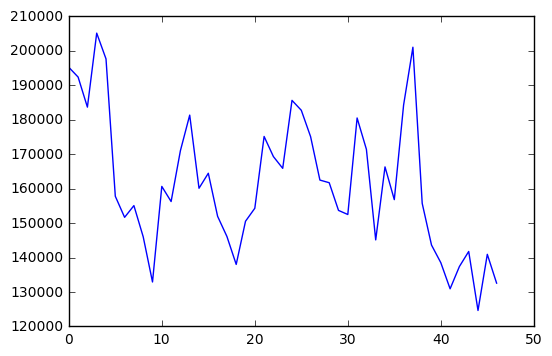

In [4]:
plt.plot(x)
plt.show

### Scaling the data

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


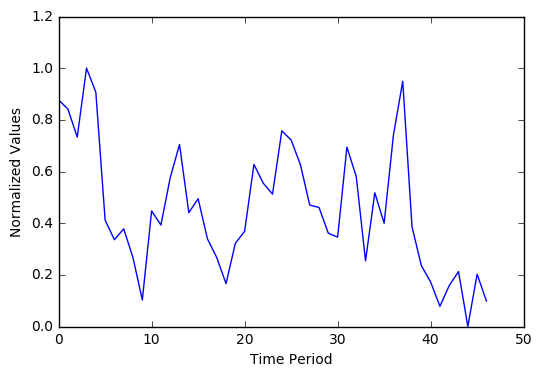

In [5]:
from sklearn.preprocessing import MinMaxScaler

x = x.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x)
x_scaled = scaler.transform(x)

plt.plot(x_scaled)
plt.xlabel('Time Period')
plt.ylabel('Normalized Values')

### Extracting Sequences

In [6]:
# Function that transforms series and window-size into an input / output set for the RNN model
def window_transform_series(series, window_size):
    """
      Arguments:
        series(np.array(list)): Sequence of Values
        window_size(int      ): Size of window
      
      Return:
         X(np.array(list(list))): Input Matrix
         y(np.array(list))      : Output Array
    """

    # Objects for input/output 
    X = np.asarray([series[i:(i + window_size)] for i in range(len(series) - window_size)])
    y = np.asarray([series[i + window_size] for i in range(len(series) - window_size)])

    return X,y

In [7]:
window_size = 6
X,y = window_transform_series(series = x_scaled, window_size = window_size)

### Training an Test Split

In [8]:

seed = 7
X_train , X_test , y_train , y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=seed)#int(np.ceil(2*len(y)/float(3)))  # Ponto de spplit

# To create the RNN LSTM Model with Keras our data must be in the format [samples, window size, stepsize]
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

### Building the RNN Model

In [9]:
def build_RNN(window_size):
    model = Sequential()
    model.add(LSTM(5, input_shape=(window_size,1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
import keras

# Random seed
np.random.seed(0)

# Build
model = build_RNN(window_size)

# Otimizer
#optimizer = keras.optimizers.RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

# Compile
model.compile(loss = 'mean_squared_error', optimizer = 'rmsprop')

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, epochs = 2000, batch_size = 12, verbose = 1)

Epoch 1/2000
32/32 [==============================] - 2s 68ms/step - loss: 0.0892
Epoch 2/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0840
Epoch 3/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0677
Epoch 4/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0612
Epoch 5/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0804
Epoch 6/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0562
Epoch 7/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0542
Epoch 8/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0686
Epoch 9/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0583
Epoch 10/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0446
Epoch 11/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0516
Epoch 12/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0523
Ep

Epoch 99/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0389
Epoch 100/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 101/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0368
Epoch 102/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 103/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0532
Epoch 104/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0399
Epoch 105/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0449
Epoch 106/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 107/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0430
Epoch 108/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0461
Epoch 109/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0369
Epoch 110/2000
32/32 [==============================] - 0s 1ms/step - lo

32/32 [==============================] - 0s 488us/step - loss: 0.0351
Epoch 196/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 197/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0315
Epoch 198/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0290
Epoch 199/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0449
Epoch 200/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0422
Epoch 201/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 202/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 203/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0473
Epoch 204/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0409
Epoch 205/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0337
Epoch 206/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0363
Epo

32/32 [==============================] - 0s 977us/step - loss: 0.0319
Epoch 292/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0361
Epoch 293/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 294/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0315
Epoch 295/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 296/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0310
Epoch 297/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0350
Epoch 298/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0292
Epoch 299/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0366
Epoch 300/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0343
Epoch 301/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0318
Epoch 302/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0343

32/32 [==============================] - 0s 977us/step - loss: 0.0308
Epoch 388/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0356
Epoch 389/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0323
Epoch 390/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0340
Epoch 391/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0356
Epoch 392/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0278
Epoch 393/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0338
Epoch 394/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0322
Epoch 395/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0371
Epoch 396/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0285
Epoch 397/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0338
Epoch 398/2000
32/32 [==============================] - 0s 977us/step - loss: 0.

Epoch 484/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0314
Epoch 485/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0249
Epoch 486/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0300
Epoch 487/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 488/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0283
Epoch 489/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0318
Epoch 490/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0338
Epoch 491/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0270
Epoch 492/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0269
Epoch 493/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0363
Epoch 494/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0361
Epoch 495/2000
32/32 [==============================] - 0s 488us/step -

32/32 [==============================] - 0s 977us/step - loss: 0.0281
Epoch 581/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0292
Epoch 582/2000
32/32 [==============================] - ETA: 0s - loss: 0.029 - 0s 977us/step - loss: 0.0300
Epoch 583/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0323
Epoch 584/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0298
Epoch 585/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0244
Epoch 586/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0287
Epoch 587/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0307
Epoch 588/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0297
Epoch 589/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0291
Epoch 590/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0318
Epoch 591/2000
32/32 [==============================] - 

32/32 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 677/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 678/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0297
Epoch 679/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0224
Epoch 680/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0283
Epoch 681/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0290
Epoch 682/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0274
Epoch 683/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0302
Epoch 684/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0278
Epoch 685/2000
32/32 [==============================] - ETA: 0s - loss: 0.026 - 0s 488us/step - loss: 0.0267
Epoch 686/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0231
Epoch 687/2000
32/32 [==============================] - 0s 1ms/s

32/32 [==============================] - 0s 977us/step - loss: 0.0270
Epoch 773/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0242
Epoch 774/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0274
Epoch 775/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0293
Epoch 776/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0289
Epoch 777/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0260
Epoch 778/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0268
Epoch 779/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0253
Epoch 780/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0278
Epoch 781/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0260
Epoch 782/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0212
Epoch 783/2000
32/32 [==============================] - 0s 977us/step - loss: 0.

32/32 [==============================] - 0s 977us/step - loss: 0.0292
Epoch 869/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0249
Epoch 870/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0294
Epoch 871/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0302
Epoch 872/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0297
Epoch 873/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0270
Epoch 874/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0203
Epoch 875/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0222
Epoch 876/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0275
Epoch 877/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0304
Epoch 878/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0318
Epoch 879/2000
32/32 [==============================] - 0s 977us/step - loss: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 965/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0252
Epoch 966/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 967/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 968/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0297
Epoch 969/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0260
Epoch 970/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0347
Epoch 971/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0242
Epoch 972/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0246
Epoch 973/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0216
Epoch 974/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0292
Epoch 975/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0282
E

32/32 [==============================] - 0s 977us/step - loss: 0.0224
Epoch 1061/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0276
Epoch 1062/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0295
Epoch 1063/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0259
Epoch 1064/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0262
Epoch 1065/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0223
Epoch 1066/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0264
Epoch 1067/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0239
Epoch 1068/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0235
Epoch 1069/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0265
Epoch 1070/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0302
Epoch 1071/2000
32/32 [==============================] - 0s 1ms/step -

32/32 [==============================] - 0s 977us/step - loss: 0.0282
Epoch 1156/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0272
Epoch 1157/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0243
Epoch 1158/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0206
Epoch 1159/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0266
Epoch 1160/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0222
Epoch 1161/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0241
Epoch 1162/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0219
Epoch 1163/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0235
Epoch 1164/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0241
Epoch 1165/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0276
Epoch 1166/2000
32/32 [==============================] - 0s 488us/step

32/32 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 1252/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0208
Epoch 1253/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 1254/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 1255/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 1256/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 1257/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 1258/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 1259/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 1260/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 1261/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 1262/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 12

32/32 [==============================] - 0s 977us/step - loss: 0.0213
Epoch 1347/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0209
Epoch 1348/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0228
Epoch 1349/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 1350/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0253
Epoch 1351/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 1352/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 1353/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0259
Epoch 1354/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 1355/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0212
Epoch 1356/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0184
Epoch 1357/2000
32/32 [==============================] - 0s 977us/step - loss:

32/32 [==============================] - 0s 977us/step - loss: 0.0233
Epoch 1442/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0199
Epoch 1443/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0237
Epoch 1444/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0190
Epoch 1445/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0208
Epoch 1446/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0171
Epoch 1447/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0220
Epoch 1448/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0238
Epoch 1449/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0191
Epoch 1450/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0200
Epoch 1451/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0211
Epoch 1452/2000
32/32 [==============================] - 0s 488us/step

32/32 [==============================] - 0s 488us/step - loss: 0.0188
Epoch 1537/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0172
Epoch 1538/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0219
Epoch 1539/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0194
Epoch 1540/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0182
Epoch 1541/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0175
Epoch 1542/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0182
Epoch 1543/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0207
Epoch 1544/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0220
Epoch 1545/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0196
Epoch 1546/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0216
Epoch 1547/2000
32/32 [==============================] - 0s 977us/step

32/32 [==============================] - 0s 977us/step - loss: 0.0239
Epoch 1632/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0194
Epoch 1633/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0190
Epoch 1634/2000
32/32 [==============================] - 0s 976us/step - loss: 0.0172
Epoch 1635/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0198
Epoch 1636/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0188
Epoch 1637/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0206
Epoch 1638/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0232
Epoch 1639/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0270
Epoch 1640/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0242
Epoch 1641/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0213
Epoch 1642/2000
32/32 [==============================] - 0s 488us/step

32/32 [==============================] - 0s 977us/step - loss: 0.0206
Epoch 1727/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0190
Epoch 1728/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0178
Epoch 1729/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0180
Epoch 1730/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0197
Epoch 1731/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0164
Epoch 1732/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0192
Epoch 1733/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0189
Epoch 1734/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0261
Epoch 1735/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0208
Epoch 1736/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0197
Epoch 1737/2000
32/32 [==============================] - 0s 1ms/step -

32/32 [==============================] - 0s 977us/step - loss: 0.0181
Epoch 1822/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0195
Epoch 1823/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0180
Epoch 1824/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0162
Epoch 1825/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0192
Epoch 1826/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0175
Epoch 1827/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0166
Epoch 1828/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0195
Epoch 1829/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0184
Epoch 1830/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0170
Epoch 1831/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0182
Epoch 1832/2000
32/32 [==============================] - 0s 977us/step

32/32 [==============================] - 0s 488us/step - loss: 0.0173
Epoch 1917/2000
32/32 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 1918/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0220
Epoch 1919/2000
32/32 [==============================] - 0s 488us/step - loss: 0.0169
Epoch 1920/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0195
Epoch 1921/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0148
Epoch 1922/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0177
Epoch 1923/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0200
Epoch 1924/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0172
Epoch 1925/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0179
Epoch 1926/2000
32/32 [==============================] - 0s 977us/step - loss: 0.0165
Epoch 1927/2000
32/32 [==============================] - 0s 1ms/step - l

In [13]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [14]:
# Print of training and test errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('Erro em Treinamento = %.3f %%' % training_error)

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('Erro em Teste = %.3f %%' %  testing_error)

Erro em Treinamento = 0.015 %
Erro em Teste = 0.035 %


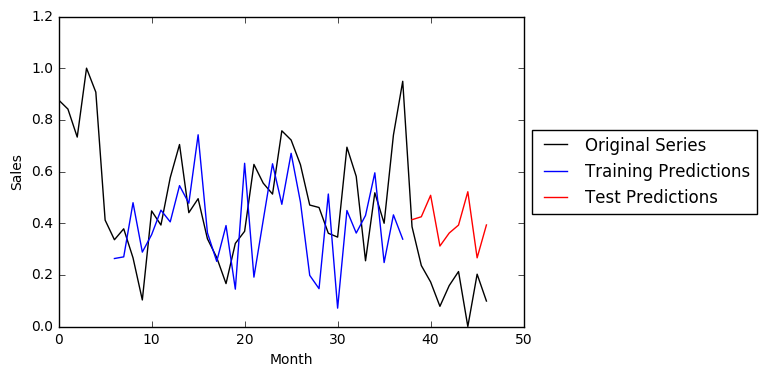

In [15]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot of the original series
plt.plot(x_scaled,color = 'k')

# Plot of predictions in training
split_pt = X_train.shape[0] + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot of predictions in training
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# Plot
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['Original Series','Training Predictions','Test Predictions'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [16]:
# Also defining the RMSE metric
def rmse(y_real,y_pred):
    return np.sqrt(sum([ (m - n)**2 for m, n in zip(y_real,y_pred[:-1])]))/len(y_real)

In [17]:
mean_squared_error_train = rmse(y_train, train_predict)
mean_squared_error_test = rmse(y_test, test_predict)
print('Mean train squared error: %.5f' %  mean_squared_error_train)
print('Mean test squared error: %.5f' %  mean_squared_error_test)

Mean train squared error: 0.02144
Mean test squared error: 0.04908


### Forecasts with New Data Sets

In [18]:
new_data = np.array([138513,130927,137397,141766,124636,140939,132573])

In [19]:
new_data

array([138513, 130927, 137397, 141766, 124636, 140939, 132573])

In [20]:
new_data = new_data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(new_data)
new_data_scaled = scaler.transform(new_data)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
new_data_scaled

array([[ 0.81009924],
       [ 0.36725044],
       [ 0.74495038],
       [ 1.        ],
       [ 0.        ],
       [ 0.95172212],
       [ 0.46333917]])

In [22]:
window_size = 6
series = new_data_scaled
new_X = np.asarray([series[i:(i + window_size)] for i in range(len(series) - window_size)])

In [23]:
new_X

array([[[ 0.81009924],
        [ 0.36725044],
        [ 0.74495038],
        [ 1.        ],
        [ 0.        ],
        [ 0.95172212]]])

In [24]:
final_X = np.asarray(np.reshape(new_X, (new_X.shape[0], window_size, 1)))

In [25]:
final_X.shape

(1, 6, 1)

In [26]:
pred = model.predict(final_X)

In [27]:
print("Next value in series: ", pred)

Next value in series:  [[ 0.7761876]]


In [28]:
final_X_inversed = scaler.inverse_transform(pred)
print(final_X_inversed)

[[ 137932.09375]]
